#  K-Means Clustering


Реализовать K-Means на наборе данных пингвинов.

1. Примените K-Means к набору данных `пингвины`.
2. Постройте набор данных с метками кластеров. Похожи ли они на основную картину, полученную при графическом анализе?
3. Рассчитайте однородность, полноту и оценку v_measure. Насколько близко сходится кластеризация?

Используйте следующие числовые атрибуты:
```
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
```

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


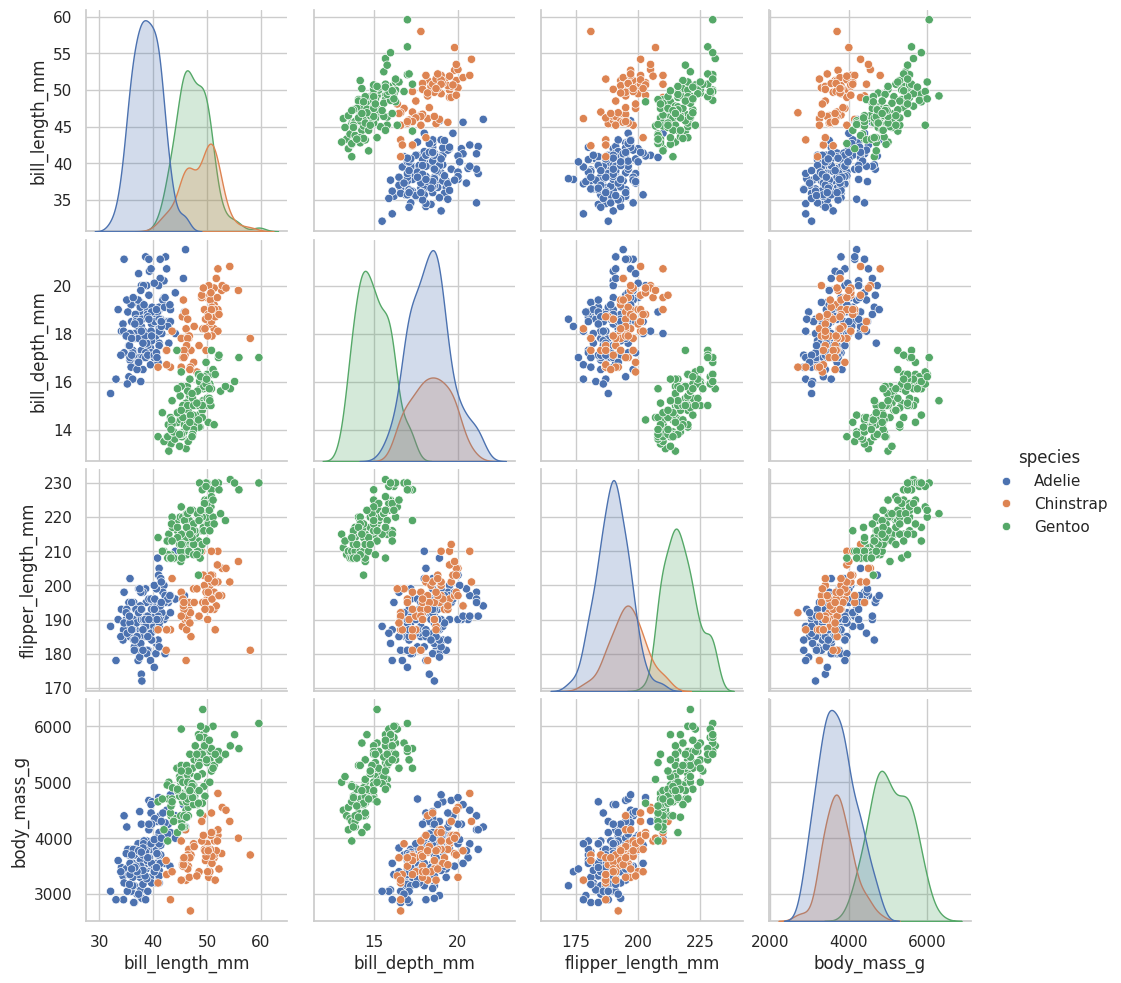

In [2]:
import seaborn as sns
import numpy as np

from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

sns.set(style='whitegrid')


penguins = sns.load_dataset("penguins")

sns.pairplot(data=penguins, hue="species")
penguins = penguins.dropna()
penguins.head()

In [6]:
penguins.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Изучим набор данных на выбросы

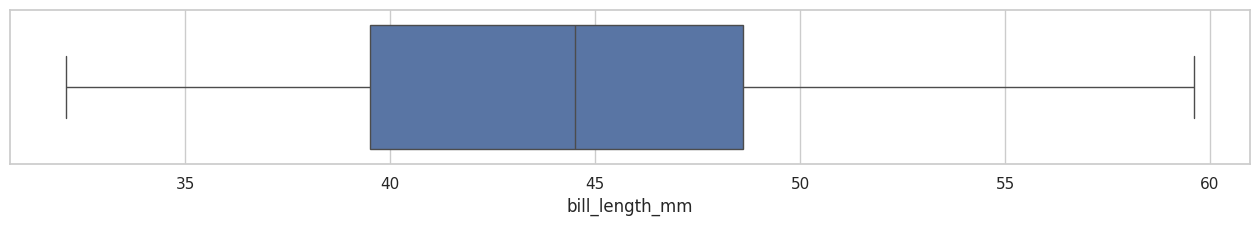

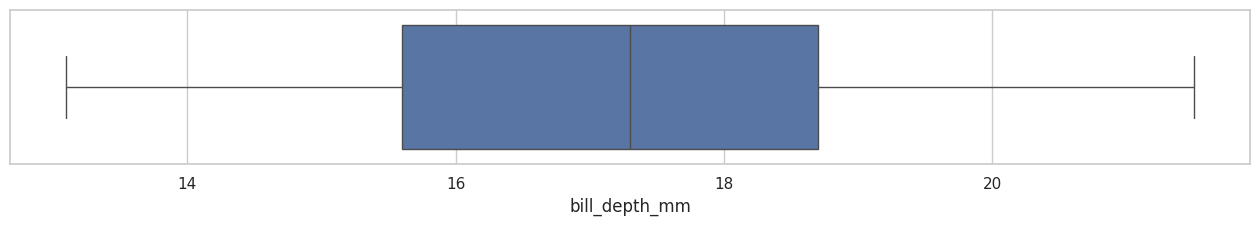

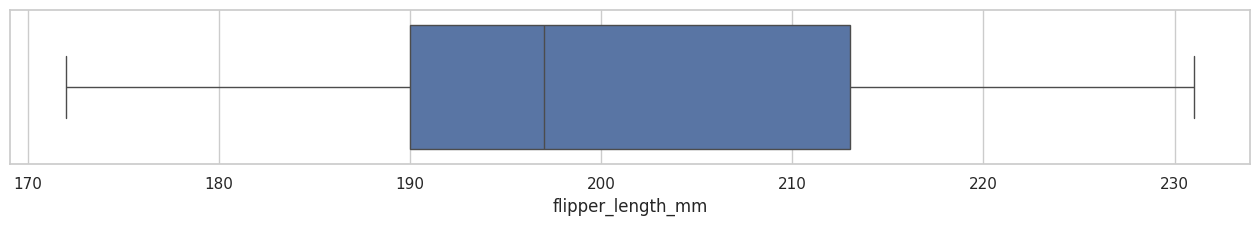

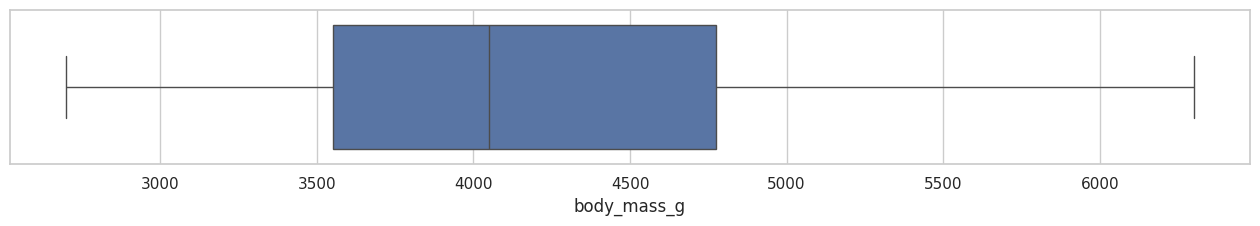

In [7]:
for col in penguins.describe().columns:
    plt.figure(figsize=(16,2))
    sns.boxplot(data=penguins, x=col)
    plt.show()

По каждому параметру из графика видно, что выбросы отсутствуют

Исследуем кол-во кластеров с помощью метода Локтя

In [8]:
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

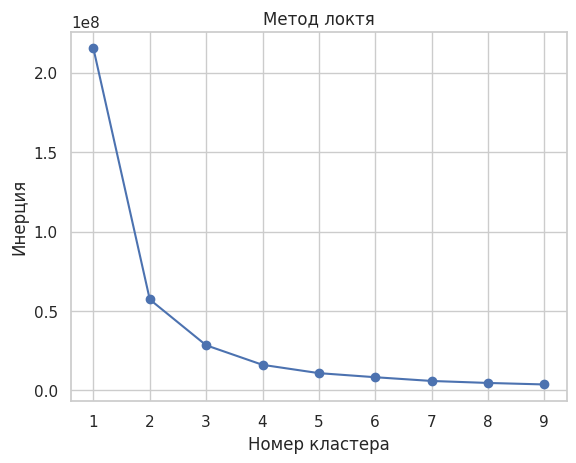

In [9]:
inertia = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters=cluster, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Номер кластера')
plt.ylabel('Инерция')
plt.title('Метод локтя')
plt.show()

Метод Локтя позволил определить оптимальное количество кластеров, а именно 3

1. Применим K-Means к набору данных пингвины.

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)
penguins['cluster'] = kmeans.labels_

print(penguins[['species', 'cluster']])

    species  cluster
0    Adelie        1
1    Adelie        1
2    Adelie        1
4    Adelie        1
5    Adelie        1
..      ...      ...
338  Gentoo        0
340  Gentoo        0
341  Gentoo        2
342  Gentoo        2
343  Gentoo        2

[333 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2. Построим набор данных с метками кластеров. Похожи ли они на основную картину, полученную при графическом анализе?

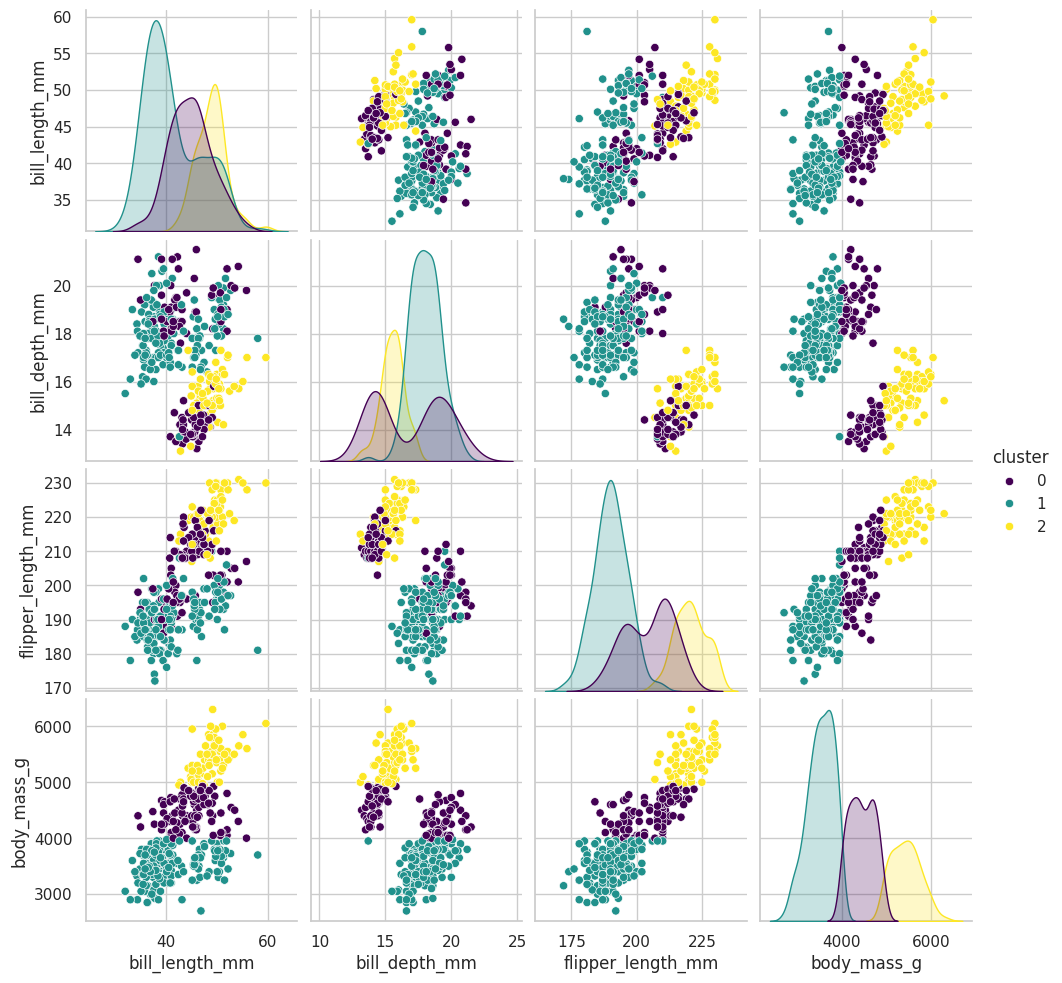

In [11]:
sns.pairplot(data=penguins, hue='cluster', palette='viridis')
plt.show()

Из данного графика видно, что они не в полной мере похожи на основную картину. Кластеризация показала, что есть признаки различия между видами пингвинов

3. Рассчитаем однородность, полноту и оценку v_measure. Насколько близко сходится кластеризация?

In [12]:
penguins['species'] = penguins['species'].astype('category')

In [13]:
metrics.homogeneity_completeness_v_measure(penguins['species'].cat.codes, kmeans.labels_)

(0.400588423922462, 0.4052070636873124, 0.4028845072990955)

Кластеризация сходится примерно на 40%. Кластеризация имеет средний уровень точности и полноты.